<a href="https://colab.research.google.com/github/alihussainia/AI-Makerspace/blob/test/LoanClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
# this will install latest pycaret version i.e. 2.3.6 at the moment
!pip install --upgrade pycaret

In [ ]:
# to install streamlit
!pip install streamlit

In [ ]:
# to allow fastapi and uvicorn webserver
!pip install fastapi uvicorn  

In [ ]:
# to create gradio ui
!pip install gradio 

In [ ]:
# to convert sklearn model into multiple languages
!pip install m2cgen evidently

In [ ]:
# to allow local port to be tunneled 
!npm install -g localtunnel

# Imports

In [8]:
# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# we only need pandas and pycaret
import pandas as pd
from pycaret.classification import *

In [ ]:
# to allow interactive charts to shown in colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


# Dataset


Reference: https://www.kaggle.com/sriharipramod/bank-loan-classification

In [ ]:
# reading dataset
dataset = pd.read_csv("UniversalBank.csv")

In [ ]:
dataset.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# removing spaces in col names
dataset.columns = [i.replace(" ", "") for i in dataset.columns]

In [ ]:
# drop columns which are not significant
dataset.drop(["ID","ZIPCode"],axis=1,inplace=True)

In [ ]:
# definign categorical features
cat_cols = ["Family","Education","SecuritiesAccount","CDAccount","Online","CreditCard"] 

In [ ]:
# defining train and test datasets
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4500, 12)
Unseen Data For Predictions: (500, 12)


# Model

Reference: https://pycaret.org/classification1/

### [`setup`](https://pycaret.org/classification1/#setup)
This function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [ ]:
# initializing the env
exp_mclf101 = setup(data = data, 
                    session_id=123, 
                    target = 'PersonalLoan', 
                    categorical_features=cat_cols,
                    normalize=True, 
                    normalize_method='minmax',
                    transformation=True,
                    use_gpu=True,
                    log_experiment=True,
                    experiment_name='loan1',
                    silent=True) 

,Description,Value
0,session_id,123
1,Target,PersonalLoan
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(4500, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


### `eda`
This function will create multiple interactive eda charts.

In [ ]:
eda()

### [`compare_models`](https://pycaret.org/classification1/#compare-models)
This function uses all models in the model library and scores them using Stratified Cross Validation.

In [ ]:
# let's compare 10+ models to find the best match
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9867,0.9980,0.8930,0.9735,0.9305,0.9232,0.9248,1.117
lightgbm,Light Gradient Boosting Machine,0.9867,0.9980,0.8864,0.9804,0.9294,0.9221,0.9245,0.117
gbc,Gradient Boosting Classifier,0.9854,0.9972,0.9024,0.9514,0.9251,0.9171,0.9181,0.409
et,Extra Trees Classifier,0.9848,0.9903,0.8582,0.9894,0.9184,0.9101,0.9133,1.094
dt,Decision Tree Classifier,0.9790,0.9449,0.9021,0.8968,0.8974,0.8857,0.8870,0.021
ada,Ada Boost Classifier,0.9698,0.9808,0.8020,0.8915,0.8406,0.8241,0.8277,0.206
lr,Logistic Regression,0.9654,0.9721,0.7385,0.9055,0.8113,0.7925,0.7987,0.078
svm,SVM - Linear Kernel,0.9603,0.0000,0.6967,0.8942,0.7776,0.7563,0.7665,0.021
knn,K Neighbors Classifier,0.9565,0.9453,0.5742,0.9887,0.7229,0.7014,0.7337,0.229
lda,Linear Discriminant Analysis,0.9403,0.9614,0.5621,0.7803,0.6510,0.6196,0.6308,0.036


In [ ]:
# have a look at the best model i.e. Random Forest Classifier
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


### [`create_model`](https://pycaret.org/classification1/#create-model)
This function creates a model and scores it using Stratified Cross Validation.

In [ ]:
# Let's pick the model
rf = create_model('rf', fold = 5, round=4) # model code, cv fold, and rounding upto _ places.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9857,0.9993,0.8730,0.9821,0.9244,0.9165,0.9185
1,0.9794,0.9944,0.8413,0.9464,0.8908,0.8794,0.8813
2,0.9825,0.9968,0.8438,0.9818,0.9076,0.8980,0.9011
3,0.9889,0.9974,0.9062,0.9831,0.9431,0.9369,0.9379
4,0.9905,0.9975,0.9206,0.9831,0.9508,0.9455,0.9462
Mean,0.9854,0.9971,0.8770,0.9753,0.9233,0.9153,0.9170
SD,0.0041,0.0016,0.0321,0.0144,0.0222,0.0244,0.0237


### [`tune_model`](https://pycaret.org/classification1/#tune-model)
This function tunes the hyperparameters of a model and scores it using Stratified Cross Validation.

In [ ]:
tuned_rf = tune_model(rf, optimize = 'AUC') # Optimize - Measure used to select the best model through hyperparameter tuning.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9873,0.9992,1.0000,0.8857,0.9394,0.9323,0.9345
1,0.9810,0.9970,0.9677,0.8571,0.9091,0.8985,0.9006
2,0.9714,0.9923,0.8750,0.8485,0.8615,0.8456,0.8457
3,0.9397,0.9944,0.9688,0.6327,0.7654,0.7326,0.7545
4,0.9810,0.9867,0.9062,0.9062,0.9062,0.8956,0.8956
5,0.9619,0.9909,0.9688,0.7381,0.8378,0.8167,0.8264
6,0.9714,0.9968,1.0000,0.7805,0.8767,0.8608,0.8693
7,0.9873,0.9915,0.9375,0.9375,0.9375,0.9304,0.9304
8,0.9810,0.9976,1.0000,0.8421,0.9143,0.9037,0.9079
9,0.9618,0.9897,0.9355,0.7436,0.8286,0.8074,0.8141


### [`plot_model`](https://pycaret.org/classification1/#plot-model)
This function takes a trained model object and returns a plot based on the test / hold-out set.

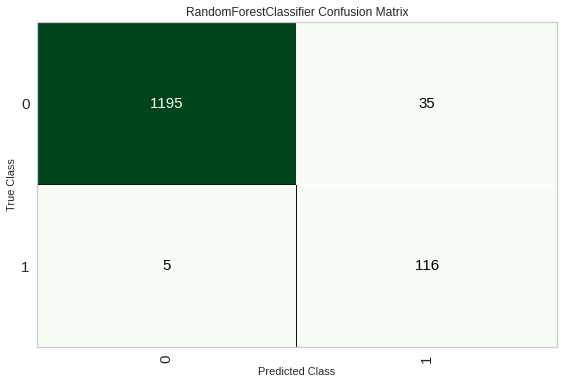

In [ ]:
plot_model(tuned_rf, plot = 'confusion_matrix')

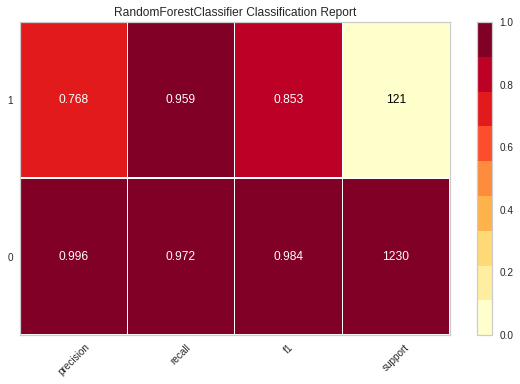

In [ ]:
plot_model(tuned_rf, plot = 'class_report')

### [`evaluate_model`](https://pycaret.org/classification1/#evaluate-model)
This function displays a user interface for all of the available plots for a given estimator. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### [`predict_model`](https://pycaret.org/classification1/#predict-model)
This function is used to predict new data using a trained estimator.

In [ ]:
predict_model(tuned_rf);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9704,0.9927,0.9587,0.7682,0.8529,0.8367,0.843


### [`finalize_model`](https://pycaret.org/classification1/#finalize-model)
This function fits the estimator onto the complete dataset passed during the setup() stage.

In [ ]:
final_rf = finalize_model(tuned_rf)

In [ ]:
print(final_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [ ]:
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Label,Score
0,37,13,29,4,0.4,2,155,0,0,0,1,0,0,0.8983
1,50,24,22,1,0.3,3,0,0,0,0,0,1,0,0.8952
2,29,5,45,3,0.1,2,0,0,0,0,1,0,0,0.8831
3,59,32,40,4,2.5,2,0,0,0,0,1,0,0,0.8808
4,46,21,193,2,8.1,3,0,1,0,0,0,0,1,0.8898


### [`save_model`](https://pycaret.org/classification1/#save-model)
This function saves the transformation pipeline and trained model object into the current active directory as a pickle file for later use.

In [ ]:
save_model(final_rf,'RF_Model_V1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Family',
                                                             'Education',
                                                             'SecuritiesAccount',
                                                             'CDAccount',
                                                             'Online',
                                                             'CreditCard'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='PersonalLoan',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='n...
                  RandomFor

### [`load_mode`](https://pycaret.org/classification1/#load-model)
This function loads a previously saved transformation pipeline and model from the current active directory into the current python environment. Load object must be a pickle file.

In [ ]:
saved_final_rf = load_model('RF_Model_V1')

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_rf, data=data_unseen, drift_report=True) # use cmd+R and then enter c:/users/owner/pycaret/

In [ ]:
new_prediction.head() # both above one and this is identical

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Label,Score
0,37,13,29,4,0.4,2,155,0,0,0,1,0,0,0.8983
1,50,24,22,1,0.3,3,0,0,0,0,0,1,0,0.8952
2,29,5,45,3,0.1,2,0,0,0,0,1,0,0,0.8831
3,59,32,40,4,2.5,2,0,0,0,0,1,0,0,0.8808
4,46,21,193,2,8.1,3,0,1,0,0,0,0,1,0.8898


# Cool Features

### `convert_model`


Convert Model into different Language
* 'python'
* 'java'
* 'javascript'
* 'c'
* 'c#'
* 'f#'
* 'go'
* 'haskell'
* 'php'
* 'powershell'
* 'r'
* 'ruby'
* 'vb'
* 'dart'

In [ ]:
convert_model(final_rf, 'go') # requires sklearn pipeline

### `create_app`
This function will create a gradio app.

In [ ]:
create_app(final_rf) 

### `dashboard`
This function will create a model explainer dashboard.

In [ ]:
dashboard(final_rf, display_format='inline') # this will create an inline dashboard

In [ ]:
# dashboard(final_rf, display_format='dash', run_kwargs={'port':7000})

### `create_api`
This function will create a fastAPI instance.

In [ ]:
create_api(saved_final_rf, 'api')


API sucessfully created. This function only creates a POST API, it doesn't run it automatically.

To run your API, please run this command --> !python api.py
    


In [ ]:
!python api.py  & npx localtunnel --port 8000 # append /docs in the url

### `create_docker`
This function will create a DockerFile of the API.

In [ ]:
create_docker('api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
        


### `check_fairness`
This will allow to check model fairness with respect to a feature(s).

In [ ]:
check_fairness(final_rf, ['Age']) # fairness with R/O Age.
# check_fairness(final_rf, ['Age','Income']) 

### `mlflow ui`

In [ ]:
# to start the MLFlow server from notebook:
!mlflow ui & npx localtunnel --port 5000

# Streamlit 

In [ ]:
!streamlit run streamlit_app.py & npx localtunnel --port 8501